In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [134]:
df = pd.read_csv("/content/California_Houses.csv")
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [135]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [136]:
inputs = ['Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco']
output = ['Median_House_Value']

In [137]:
coefficients = [[] for _ in range(len(inputs))]
intercept = []
score = []

## Repeat the regression with different random states to get a simulation of the distribution of coefficients

In [138]:
regression = LinearRegression()
for state in range(1000):
  dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=state)
  regression.fit(dfTrain[inputs], dfTrain[output])
  for i in range(len(inputs)):
    coefficients[i].append(regression.coef_[0][i])
  intercept.append(regression.intercept_[0])
  score.append(regression.score(dfTest[inputs], dfTest[output]))

In [139]:
parameters = coefficients.copy()
parameters.append(intercept)
labels = inputs.copy()
labels.append("Intercept")

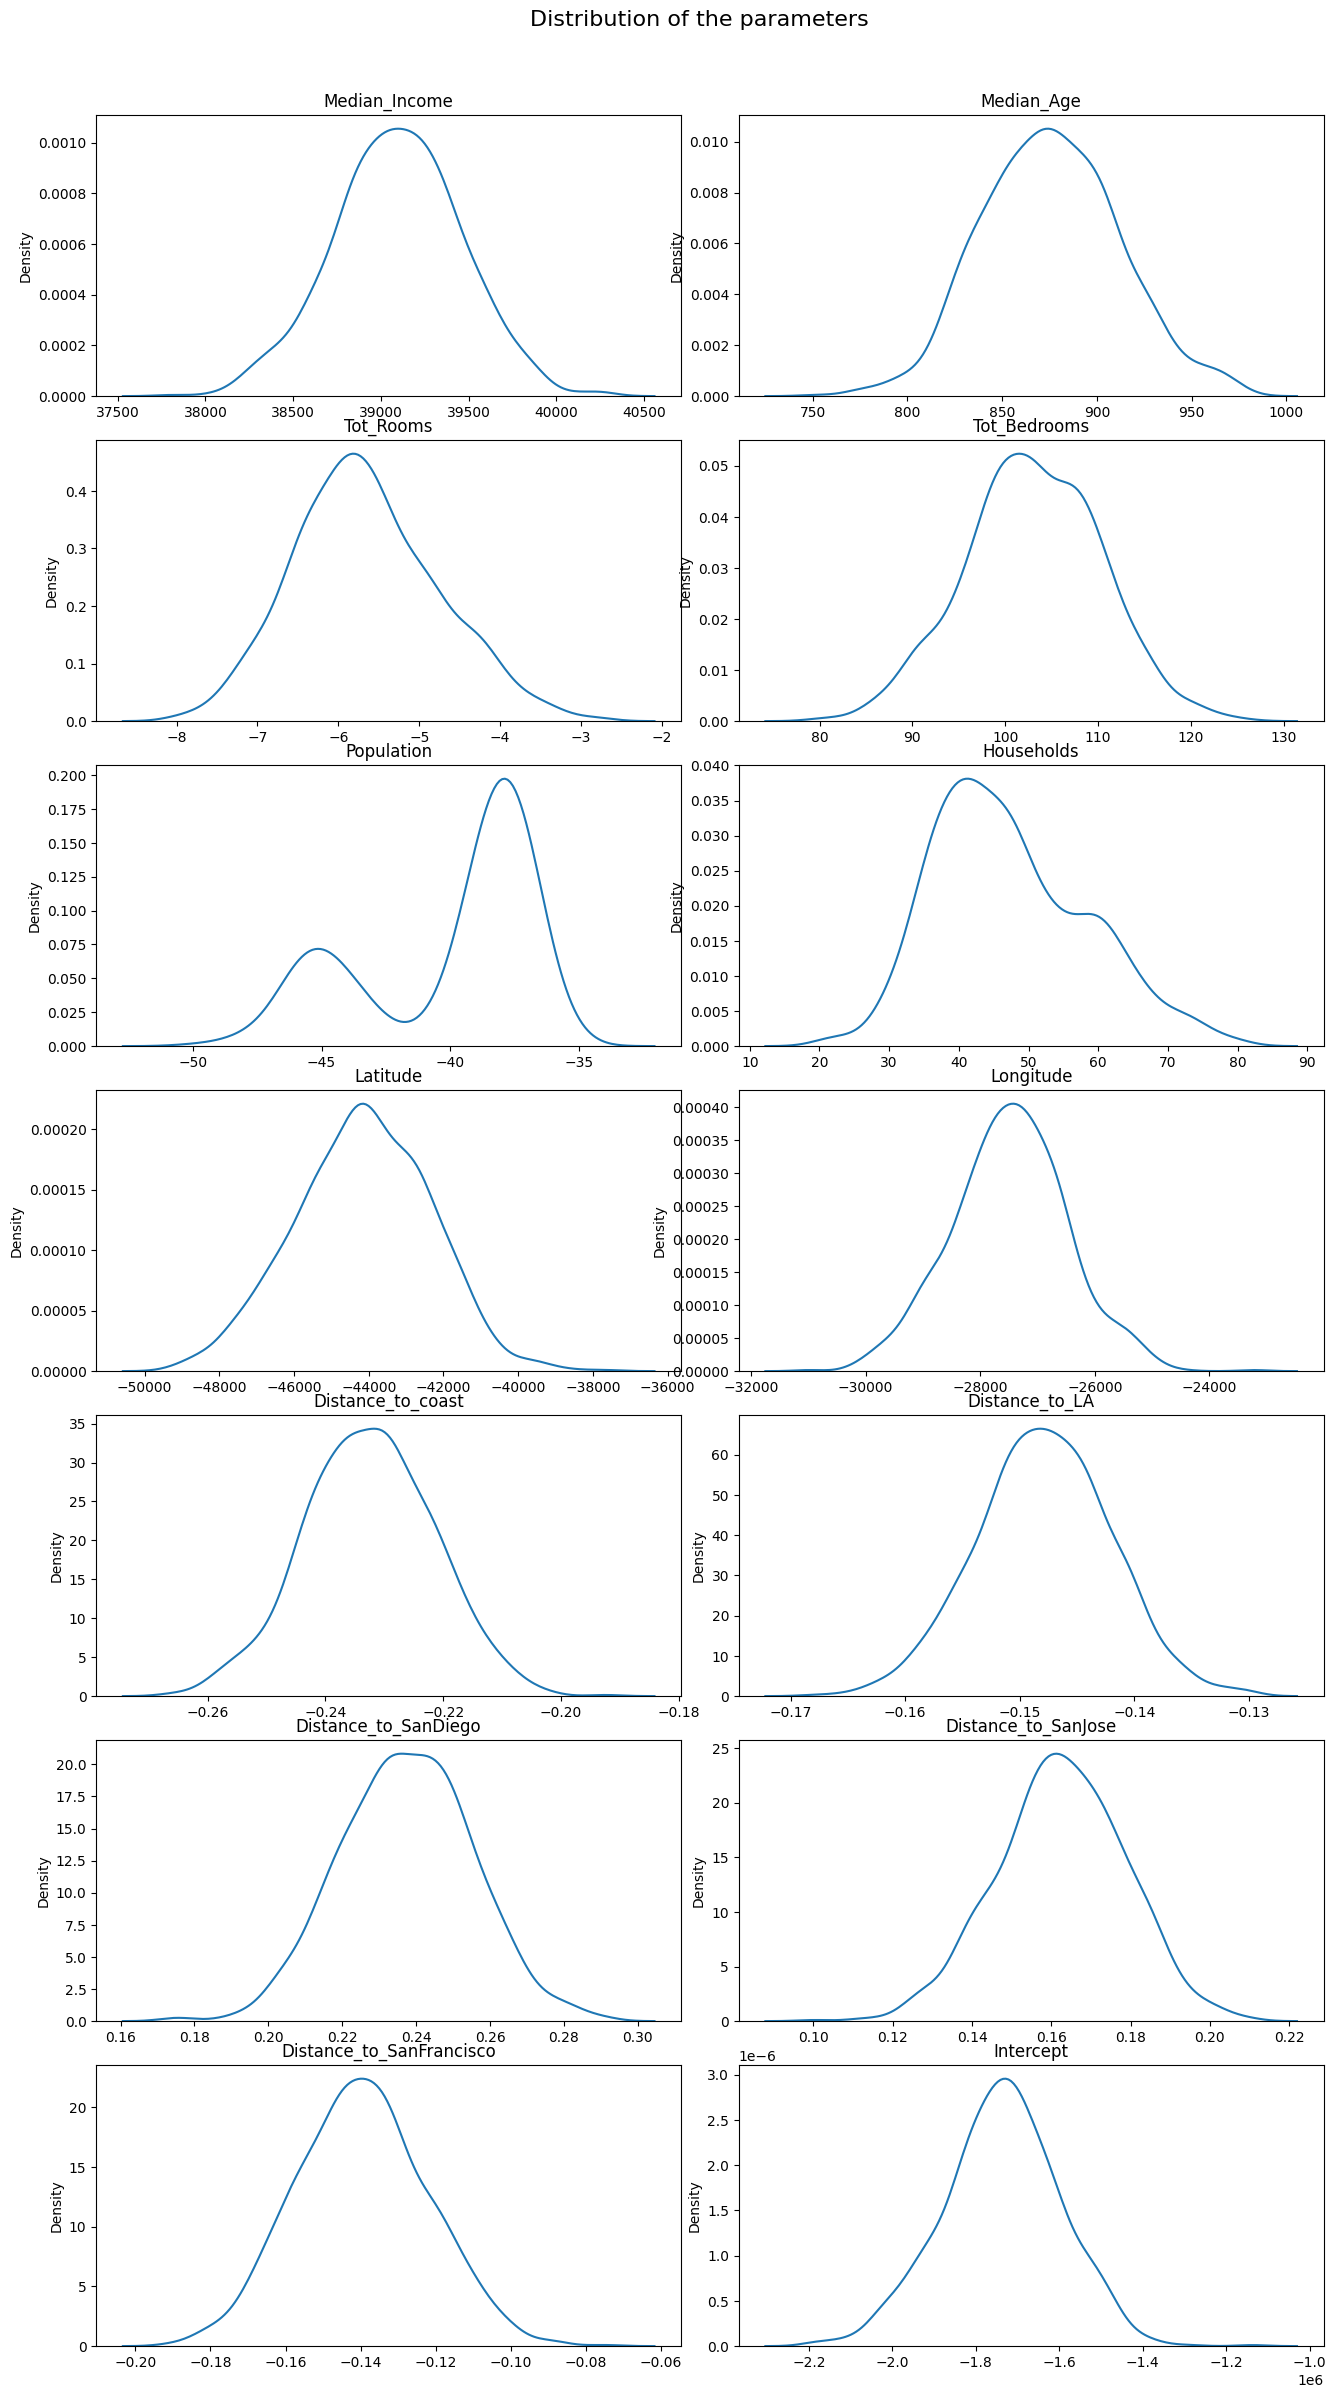

In [140]:
fig, axs = plt.subplots(7,2, figsize=(13, 25))

fig.suptitle("Distribution of the parameters", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])

for i in range(7):
  for j in range(2):
    sns.kdeplot(parameters[2*i+j], ax=axs[i, j])
    axs[i, j].set_title(labels[2*i+j])


[]

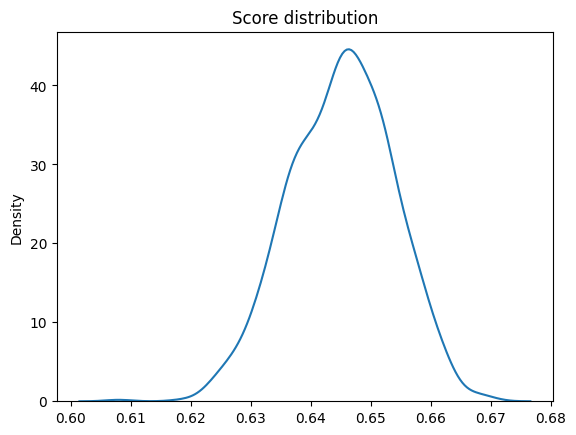

In [141]:
sns.kdeplot(score)
plt.title("Score distribution")
plt.plot()

In [142]:
averageParameters = []
for parameter in parameters:
  averageParameters.append(sum(parameter)/len(parameter))

averageParameters

[39095.34892081878,
 875.9204660648958,
 -5.656416742203111,
 103.01601611774895,
 -40.06757341720093,
 47.3433739173305,
 -44150.016541996825,
 -27483.993737647885,
 -0.23251373388424657,
 -0.14787555342303052,
 0.23746090579377754,
 0.16255053758368895,
 -0.13963448726289057,
 -1737749.239923306]

In [143]:
regression.coef_ = np.array(averageParameters[:-1])
regression.intercept_ = averageParameters[-1]
ypred = regression.predict(dfTest[inputs]).flatten()
yactu = dfTest[output].values

<Axes: >

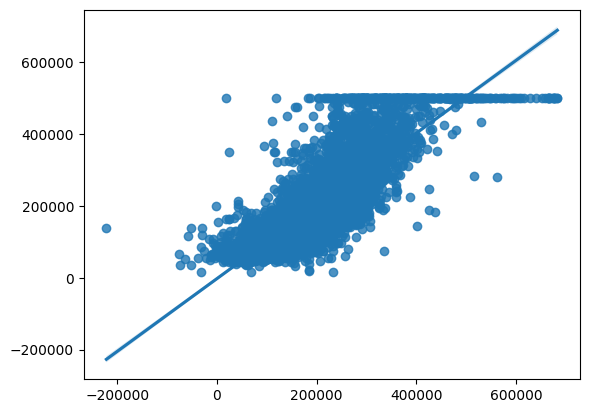

In [144]:
sns.regplot(x=ypred, y=yactu)

In [145]:
finalScores = []
for state in range(1000):
  dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=state)
  finalScores.append(regression.score(dfTest[inputs], dfTest[output]))

[]

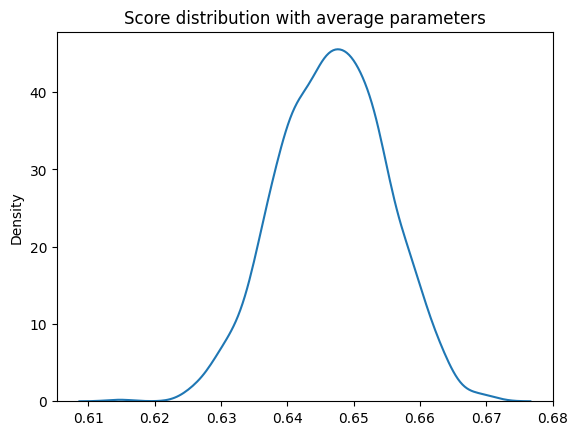

In [146]:
sns.kdeplot(finalScores)
plt.title("Score distribution with average parameters")
plt.plot()

In [147]:
print("Average score improved by:", sum(finalScores)/len(score) - sum(score)/len(score))

Average score improved by: 0.0017014752125713573
